In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [9]:
df = pd.read_csv('/content/rsfmeasureddata2011.csv')
df.head()


,Day of Week,Date and Time,Total Cooling (kW),Total Heating (kW),Total Mechanical (kW),Total Lighting (kW),Total Plug Loads (kW),Total Data Center (kW),Total Building (kW),PV (kW),Building Net (kW),Unnamed: 11
0,Saturday,1/1/2011 0:00,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,Saturday,1/1/2011 1:00,0,936,8.0,4.0,32.0,102.0,1080,0.0,1080.0,NaN
2,Saturday,1/1/2011 2:00,0,838,8.0,4.0,30.0,102.0,978,0.0,978.0,NaN
3,Saturday,1/1/2011 3:00,0,904,8.0,4.0,32.0,102.0,1046,0.0,1046.0,NaN
4,Saturday,1/1/2011 4:00,0,838,10.0,4.0,34.0,102.0,984,0.0,984.0,NaN


In [11]:
df.columns


Index(['Day of Week', 'Date and Time', 'Total Cooling (kW)',
       'Total Heating (kW)', 'Total Mechanical (kW)', 'Total Lighting (kW)',
       'Total Plug Loads (kW)', 'Total Data Center (kW)',
       'Total Building (kW)', 'PV (kW)', 'Building Net (kW)', 'Unnamed: 11'],
      dtype='object')

In [12]:
# Converter coluna de data e hora
df['Date and Time'] = pd.to_datetime(df['Date and Time'])

# Definir índice temporal
df.set_index('Date and Time', inplace=True)


In [13]:
df = df.drop(columns=['Unnamed: 11'])


In [14]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2011-01-01 00:00:00 to 2011-12-31 23:00:00
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Day of Week             8760 non-null   object 
 1   Total Cooling (kW)      8760 non-null   int64  
 2   Total Heating (kW)      8760 non-null   int64  
 3   Total Mechanical (kW)   8759 non-null   float64
 4   Total Lighting (kW)     8759 non-null   float64
 5   Total Plug Loads (kW)   8759 non-null   float64
 6   Total Data Center (kW)  8759 non-null   float64
 7   Total Building (kW)     8760 non-null   int64  
 8   PV (kW)                 8759 non-null   float64
 9   Building Net (kW)       8759 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 752.8+ KB


In [18]:
df = df.dropna()

In [19]:
df.describe()

,Total Cooling (kW),Total Heating (kW),Total Mechanical (kW),Total Lighting (kW),Total Plug Loads (kW),Total Data Center (kW),Total Building (kW),PV (kW),Building Net (kW)
count,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000
mean,3.077292,86.737070,14.332458,20.319215,41.526887,102.487499,267.795867,-104.956502,162.839365
std,6.768230,168.918874,12.653948,16.644461,13.433994,4.147134,173.050377,174.212599,259.360583
min,0.000000,0.000000,0.000000,0.000000,0.000000,92.000000,94.000000,-1142.000000,-798.000000
25%,0.000000,0.000000,4.000000,6.000000,32.000000,100.000000,154.000000,-156.000000,80.000000
50%,0.000000,0.000000,6.000000,12.000000,36.000000,102.000000,226.000000,0.000000,154.000000
75%,2.000000,118.000000,28.000000,34.000000,50.000000,106.000000,298.000000,0.000000,258.000000
max,42.000000,1644.000000,56.000000,116.000000,98.000000,122.000000,1852.000000,6.000000,1852.000000


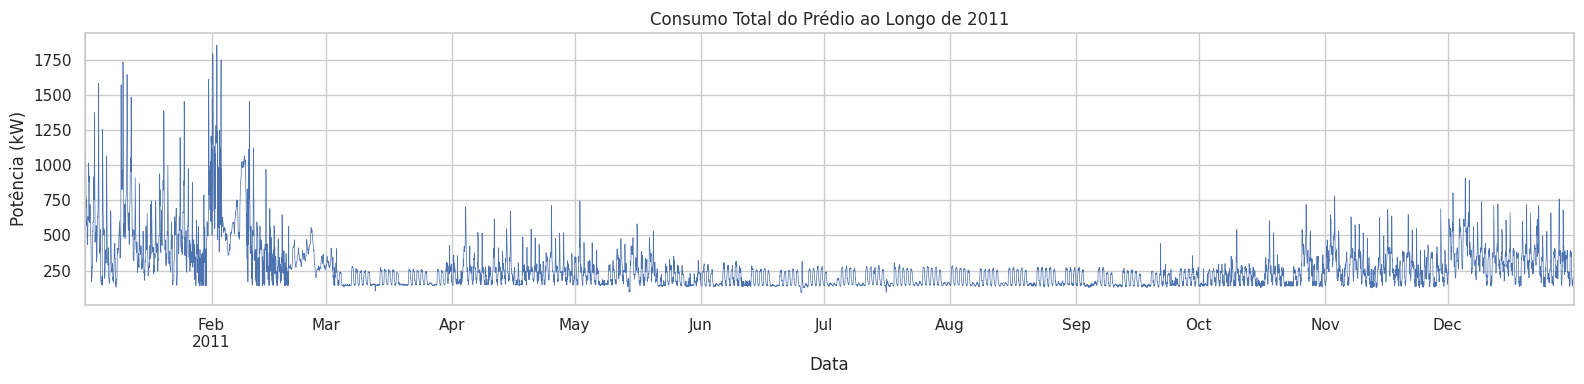

In [20]:
# Gráfico do Consumo Total do Prédio ao longo do ano

plt.figure(figsize=(16,4))
df['Total Building (kW)'].plot(lw=0.5)
plt.title('Consumo Total do Prédio ao Longo de 2011')
plt.xlabel('Data')
plt.ylabel('Potência (kW)')
plt.tight_layout()
plt.show()


In [24]:
df_clean = df.drop(columns=['Day of Week'])

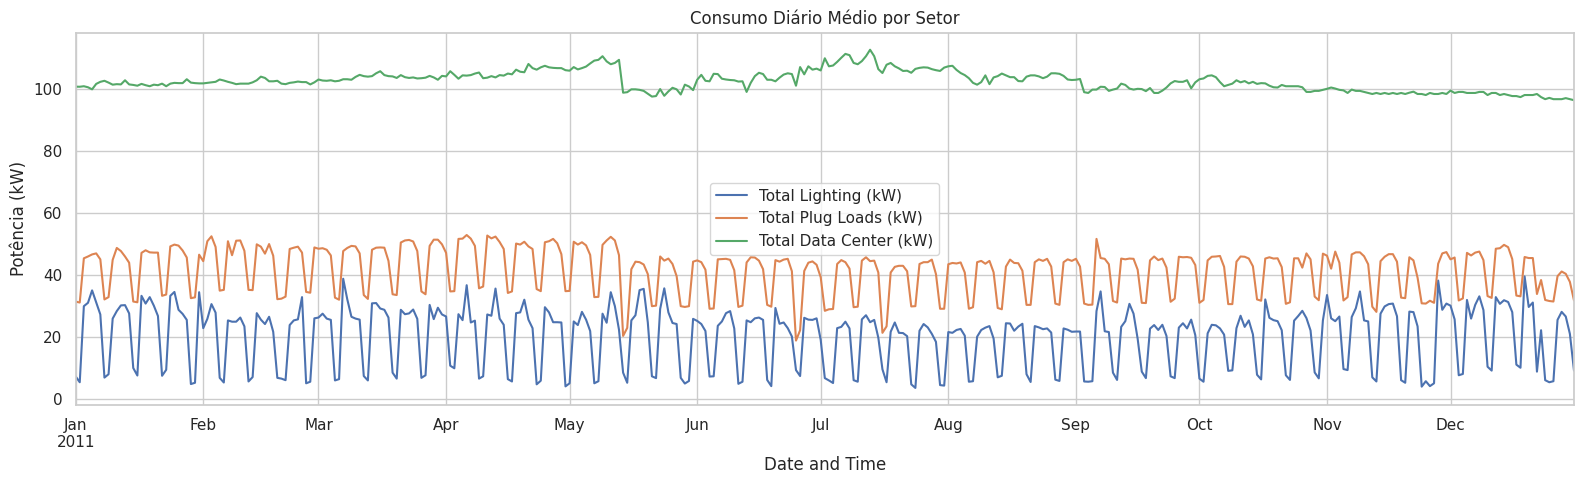

In [26]:
# Consumo Diário Médio por Setor

df_daily = df_clean.resample('D').mean()

df_daily[['Total Lighting (kW)', 'Total Plug Loads (kW)', 'Total Data Center (kW)']].plot(
    figsize=(16,5),
    title='Consumo Diário Médio por Setor'
)
plt.ylabel('Potência (kW)')
plt.tight_layout()
plt.show()


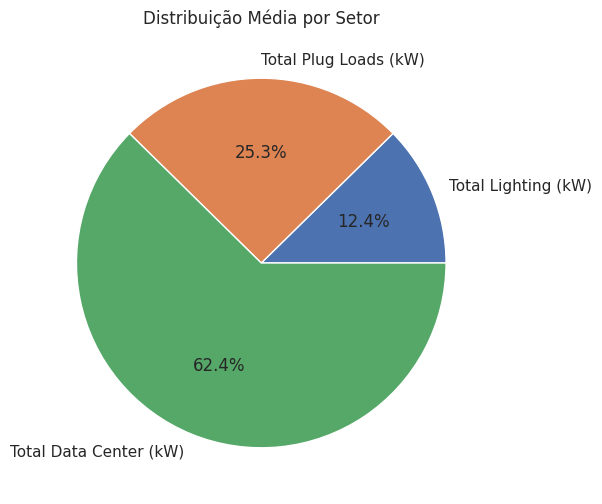

In [22]:
# Participação Percentual Média do Consumo por Setor

setores = ['Total Lighting (kW)', 'Total Plug Loads (kW)', 'Total Data Center (kW)']
media_setores = df[setores].mean()

media_setores.plot.pie(autopct='%1.1f%%', figsize=(6,6), title='Distribuição Média por Setor')
plt.ylabel('')
plt.show()

In [28]:
df_daily

,Total Cooling (kW),Total Heating (kW),Total Mechanical (kW),Total Lighting (kW),Total Plug Loads (kW),Total Data Center (kW),Total Building (kW),PV (kW),Building Net (kW)
Date and Time,,,,,,,,,
2011-01-01,0.000000,596.086957,7.739130,7.391304,31.478261,100.695652,741.217391,-26.000000,715.217391
2011-01-02,0.000000,341.583333,7.250000,5.500000,31.166667,100.666667,484.250000,-55.583333,428.666667
2011-01-03,0.500000,428.583333,19.750000,30.000000,45.416667,100.833333,623.250000,-63.333333,559.916667
2011-01-04,0.666667,371.083333,22.750000,31.083333,46.000000,100.500000,570.083333,-64.750000,505.333333
2011-01-05,0.000000,278.333333,21.833333,35.083333,46.666667,99.833333,480.000000,-28.000000,452.000000
...,...,...,...,...,...,...,...,...,...
2011-12-27,0.000000,118.500000,16.166667,25.583333,39.666667,96.666667,296.000000,-63.583333,232.416667
2011-12-28,1.833333,199.083333,15.666667,28.166667,41.166667,96.666667,382.250000,-55.333333,326.916667
2011-12-29,1.750000,150.250000,15.916667,26.666667,40.416667,97.000000,331.833333,-114.916667,216.916667
